In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math as mt
import numpy as np
import seaborn as sns
import plotly.express as px

from pathlib import Path
PROJECT_ROOT = Path(os.path.abspath('')).resolve().parents[0] 

In [2]:
df = pd.read_csv(os.path.join(PROJECT_ROOT, 'data', 'H2.csv'))
df

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,...,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,0,102,2017,August,35,31,2,5,3,0.0,...,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,0,34,2017,August,35,31,2,5,2,0.0,...,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,0,109,2017,August,35,31,2,5,2,0.0,...,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
# Organizar features
target = ['IsCanceled']

numeric_feat = ['LeadTime','ArrivalDateYear','ArrivalDateWeekNumber','ArrivalDateDayOfMonth',
           'StaysInWeekendNights','StaysInWeekNights','Adults','Children','Babies',
           'PreviousCancellations','PreviousBookingsNotCanceled','BookingChanges',
          'Agent','Company','DaysInWaitingList','ADR','RequiredCarParkingSpaces',
          'TotalOfSpecialRequests']

binary_feat = ['IsRepeatedGuest']

categorical_feat = ['ArrivalDateMonth','Meal','Country','MarketSegment','DistributionChannel','ReservedRoomType',
               'AssignedRoomType','DepositType','CustomerType','ReservationStatus']

date = ['ReservationStatusDate']



In [4]:
#Data Quality Report for Continuous Features

def DescribeContinuousFeatures(Continuous_Features, dataset):
    Continuous_Head = ['Count', 'Missing Values (%)', 'Cardinality', 'Minimum', '1st Qrt.', 'Mean', 'Median', '3rd Qrt.', 'Maximum', 'Std. Dev.']
    Continuous_Describe = pd.DataFrame(index=Continuous_Features, columns=Continuous_Head)
    Continuous_Describe.index.name = 'Feature Name'
    columns = dataset[Continuous_Features]

#Total Number of Instances
    Continuous_Describe[Continuous_Head[0]] = columns.count()

#Percentage of instances that has Missing Values (sabendo à partida que nenhuma variável contínua tem missings)
    Continuous_Describe[Continuous_Head[1]] = columns.isnull().sum() * 100 / len(dataset)
    
#Cardinality of each feature (cardinality measures the number of Distinct Values)
    Continuous_Describe[Continuous_Head[2]] = columns.nunique()

#Minimum Value
    Continuous_Describe[Continuous_Head[3]] = columns.min()

#1ST Quartile
    Continuous_Describe[Continuous_Head[4]] = columns.quantile(0.25)

#Mean
    Continuous_Describe[Continuous_Head[5]] = round(columns.mean(), 2)

#Median
    Continuous_Describe[Continuous_Head[6]] = columns.median()

#3rd Quartile
    Continuous_Describe[Continuous_Head[7]] = columns.quantile(0.75)

#Maximum Value
    Continuous_Describe[Continuous_Head[8]] = columns.max()

#Standard Deviation
    Continuous_Describe[Continuous_Head[9]] = round(columns.std(),2)
    
    return Continuous_Describe

DescribeContinuousFeatures(numeric_feat,df)

,Count,Missing Values (%),Cardinality,Minimum,1st Qrt.,Mean,Median,3rd Qrt.,Maximum,Std. Dev.
Feature Name,,,,,,,,,,
LeadTime,79330,0.000000,453,0,23.0,109.74,74.0,163.0,629,110.95
ArrivalDateYear,79330,0.000000,3,2015,2016.0,2016.17,2016.0,2017.0,2017,0.70
ArrivalDateWeekNumber,79330,0.000000,53,1,17.0,27.18,27.0,38.0,53,13.40
ArrivalDateDayOfMonth,79330,0.000000,31,1,8.0,15.79,16.0,23.0,31,8.73
StaysInWeekendNights,79330,0.000000,14,0,0.0,0.80,1.0,2.0,16,0.89
StaysInWeekNights,79330,0.000000,29,0,1.0,2.18,2.0,3.0,41,1.46
Adults,79330,0.000000,5,0,2.0,1.85,2.0,2.0,4,0.51
Children,79326,0.005042,4,0,0.0,0.09,0.0,0.0,3,0.37
Babies,79330,0.000000,5,0,0.0,0.00,0.0,0.0,10,0.08


In [5]:
#Data Quality Report for Categorical Features

def DescribeCategoricalFeatures(Categorical_Features, dataset):
    Categorical_Head = ['Count', 'Missing Values (%)', 'Cardinality', 'Mode', 'Mode frequency', 'Mode (%)',\
                        '2nd Mode', '2nd Mode frequency', '2nd Mode (%)']

    Categorical_Describe = pd.DataFrame(index=Categorical_Features, columns=Categorical_Head)
    Categorical_Describe.index.name = 'Feature Name'
    columns = dataset[Categorical_Features]
    
    #Total Number of Instances
    Categorical_Describe[Categorical_Head[0]] = columns.count()
    missings = []
    for col in columns:
        missings.append(len(dataset[dataset[col]=='?']) * 100/ len(dataset))
    #Percentage of instances that has Missing Values 
    Categorical_Describe[Categorical_Head[1]] = missings
    
    #Cardinality of each feature (cardinality measures the number of Distinct Values)
    Categorical_Describe[Categorical_Head[2]] = columns.nunique()
    
    Categorical_Describe[Categorical_Head[3]] = columns.mode().T
    
    Categorical_Describe[Categorical_Head[4]] = columns.describe().T['freq']
    
    Categorical_Describe[Categorical_Head[5]] = columns.describe().T['freq']/columns.describe().T['count']
    
    snd_modes = []
    snd_modes_freq = []
    for col in columns:
        snd_modes.append(columns[col].value_counts().index[1])
        snd_modes_freq.append(columns[col].value_counts()[1])
        
    Categorical_Describe[Categorical_Head[6]] = snd_modes
    
    Categorical_Describe[Categorical_Head[7]] = snd_modes_freq
    
    Categorical_Describe[Categorical_Head[8]] = Categorical_Describe[Categorical_Head[7]]/columns.describe().T['count']
    
    return Categorical_Describe

DescribeCategoricalFeatures(categorical_feat,df)

,Count,Missing Values (%),Cardinality,Mode,Mode frequency,Mode (%),2nd Mode,2nd Mode frequency,2nd Mode (%)
Feature Name,,,,,,,,,
ArrivalDateMonth,79330,0.0,12,August,8983,0.113236,May,8232,0.103769
Meal,79330,0.0,4,BB,62305,0.78539,SC,10564,0.133165
Country,79306,0.0,166,PRT,30960,0.390387,FRA,8804,0.111013
MarketSegment,79330,0.0,8,Online TA,38748,0.488441,Offline TA/TO,16747,0.211106
DistributionChannel,79330,0.0,5,TA/TO,68945,0.869091,Direct,6780,0.0854658
ReservedRoomType,79330,0.0,8,A,62595,0.789046,D,11768,0.148342
AssignedRoomType,79330,0.0,9,A,57007,0.718606,D,14983,0.188869
DepositType,79330,0.0,3,No Deposit,66442,0.837539,Non Refund,12868,0.162208
CustomerType,79330,0.0,4,Transient,59404,0.748821,Transient-Party,17333,0.218492


In [6]:
def plot_bar(features_list,direction='h'):
    fig, axarr = plt.subplots(round(len(features_list)/2), 2, figsize=(20, 25))

    a = 0
    b = 0 
    c = 1
    for feat in features_list:
        if direction == 'v': 
            df[feat].value_counts().plot.bar(
                ax=axarr[a][b], fontsize=18, color='tomato')
            axarr[a][b].set_title(feat, fontsize=20)
            
            plt.subplots_adjust(hspace=0.3,wspace=0.6)
            plt.suptitle('Numerical Variables Absolute Frequencies',fontsize = 30, x = 0.43, y = 0.93)
            
        else: 
            df[feat].value_counts().plot.barh(
                ax=axarr[a][b], fontsize=18, color='tomato')
            axarr[a][b].set_title(feat, fontsize=20)
            
            plt.subplots_adjust(hspace=0.3,wspace=0.6)
            plt.suptitle('Categorical Variables Absolute Frequencies',fontsize = 30, x = 0.43, y = 0.93)
            
        if b == 0:
            b = 1
        else:
            b=0

        if c % 2 == 0:
            a += 1

        c+=1
        
    plt.show()

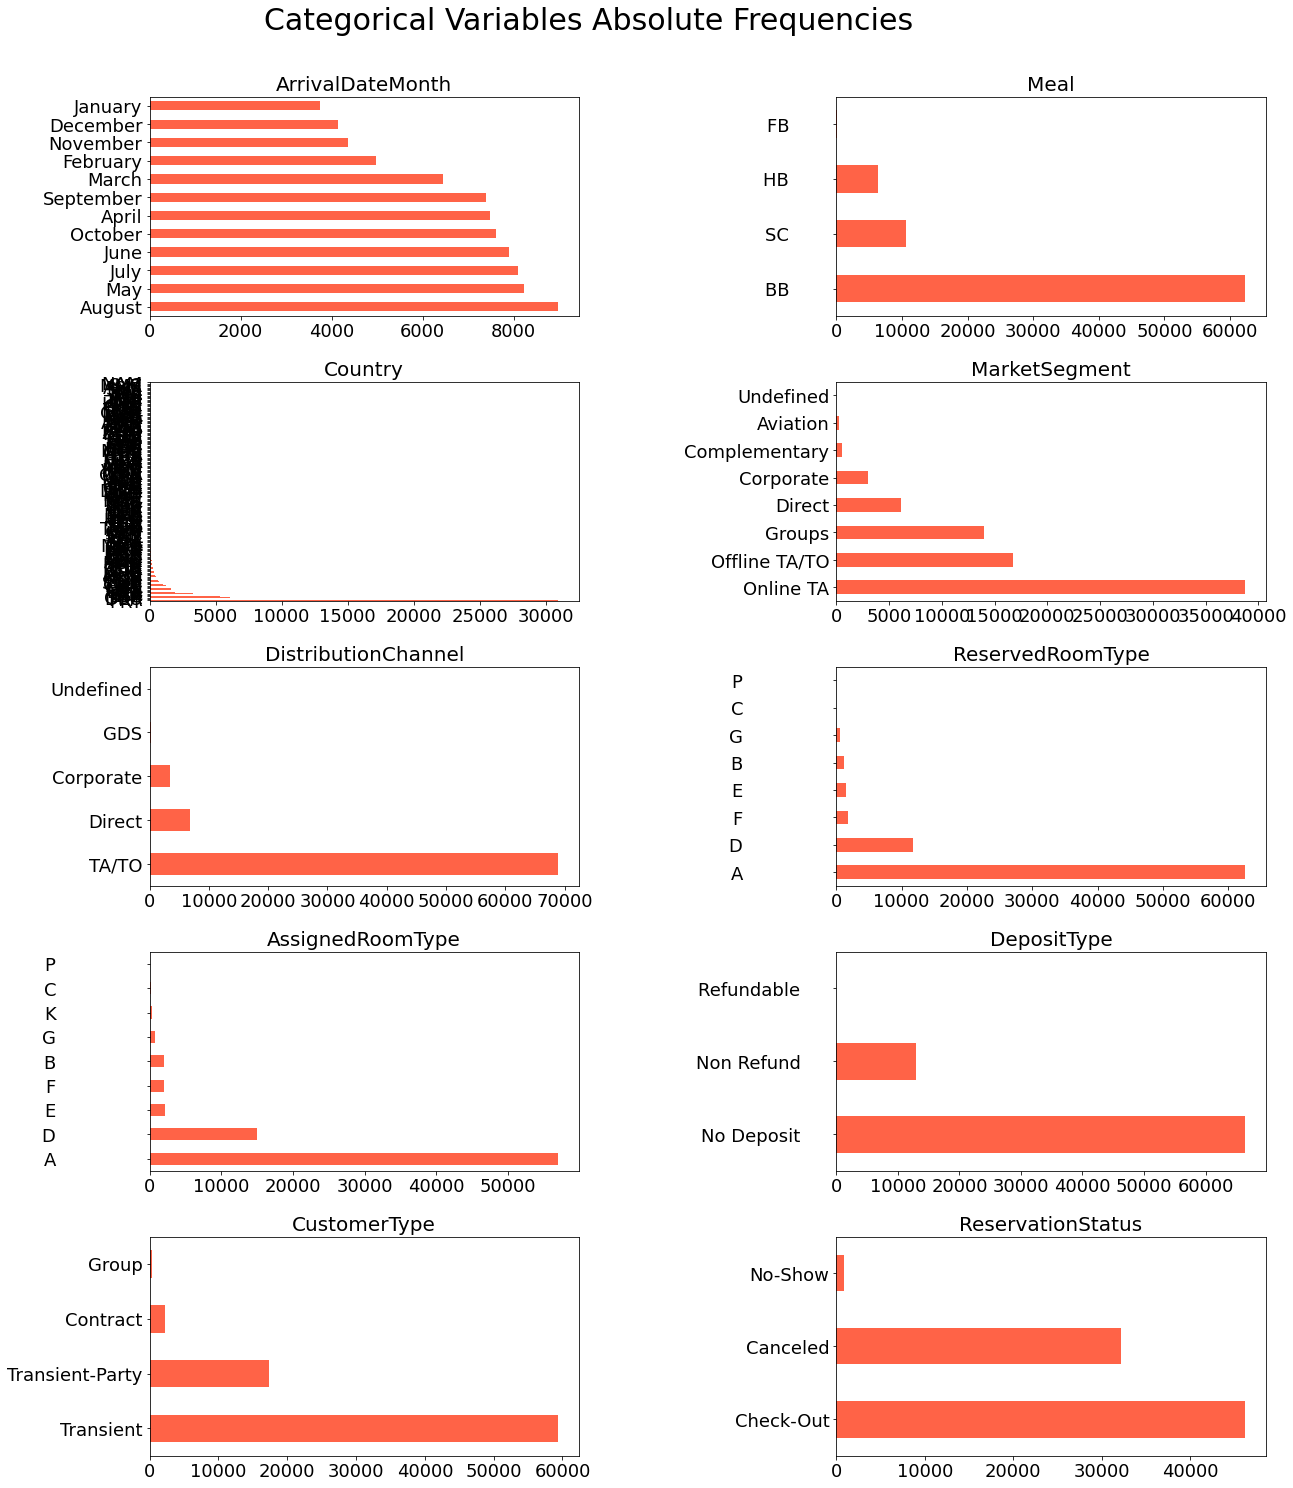

In [12]:
plot_bar(categorical_feat,'h')

In [18]:
country_cancel = df['Country'].value_counts().rename("Occurrences").to_frame()
country_cancel['canceled'] = df[df['IsCanceled']==1]['Country'].value_counts()
country_cancel = country_cancel.fillna(0)
country_cancel['%canceled'] = country_cancel['canceled']/country_cancel['Occurrences']

fig = px.choropleth(country_cancel, locations=country_cancel.index,
                    color='%canceled', # lifeExp is a column of gapminder
                    hover_name=country_cancel.index, # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Sunset,
                   title='Country % of cancelations')
fig.show()
fig.write_image("map.png")

In [57]:
#country_cancel['%canceled'].sort_values(ascending=False).head(30)
a = country_cancel.sort_values(by=['Occurrences'],ascending=False).head(15)
a['%canceled'].sort_values(ascending=False)


PRT    0.648611
CHN    0.523699
BRA    0.406355
ITA    0.378893
IRL    0.330852
GBR    0.293885
ESP    0.287573
USA    0.265142
CHE    0.244015
BEL    0.219113
SWE    0.213889
NLD    0.208176
FRA    0.195706
AUT    0.186135
DEU    0.176200
Name: %canceled, dtype: float64

In [14]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="skyblue")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.xticks(rotation='vertical')
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="skyblue")
    plt.xticks(rotation='vertical')
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()

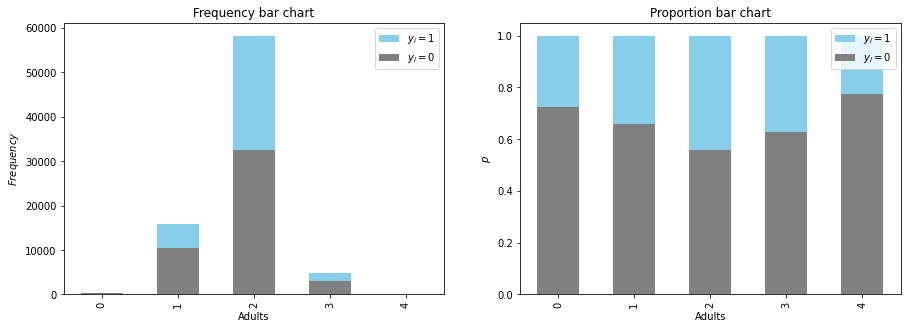

In [19]:
bar_charts_categorical(df, 'Adults', 'IsCanceled')

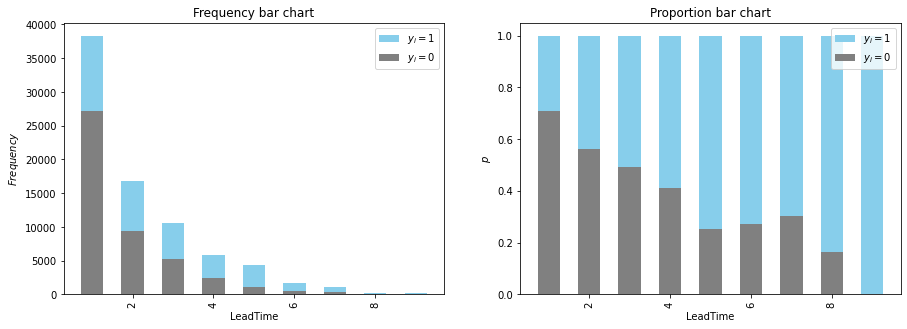

In [42]:
bins_df = df[['IsCanceled','LeadTime']].copy()
#bins_df.loc[(bins_df['ADR'] > 5000), 'ADR'] = 0

min_value = bins_df['LeadTime'].min()
max_value = bins_df['LeadTime'].max()

bins = np.linspace(min_value,max_value,10)
labels = [1,2,3,4,5,6,7,8,9]
bins_df['LeadTime'] = pd.cut(bins_df['LeadTime'], bins=bins, labels=labels, include_lowest=True)

bar_charts_categorical(bins_df, 'LeadTime', 'IsCanceled')

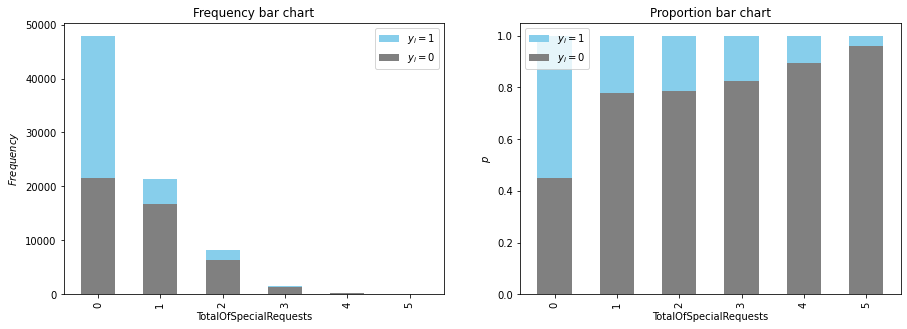

In [39]:
bar_charts_categorical(df, 'TotalOfSpecialRequests', 'IsCanceled')

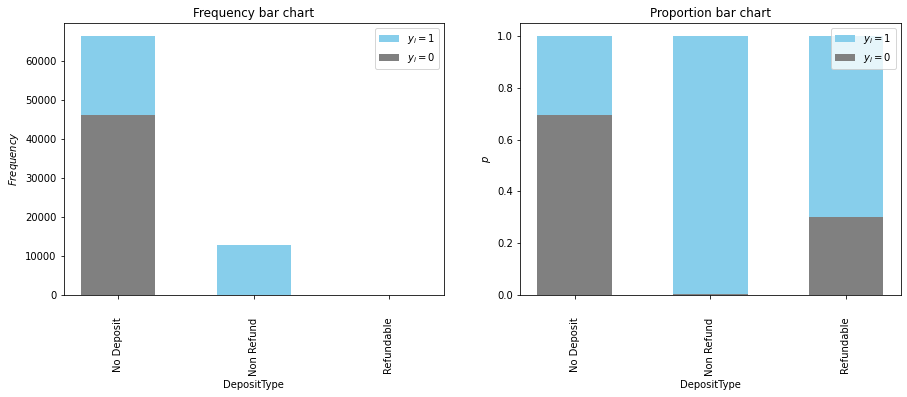

In [40]:
bar_charts_categorical(df, 'DepositType', 'IsCanceled')

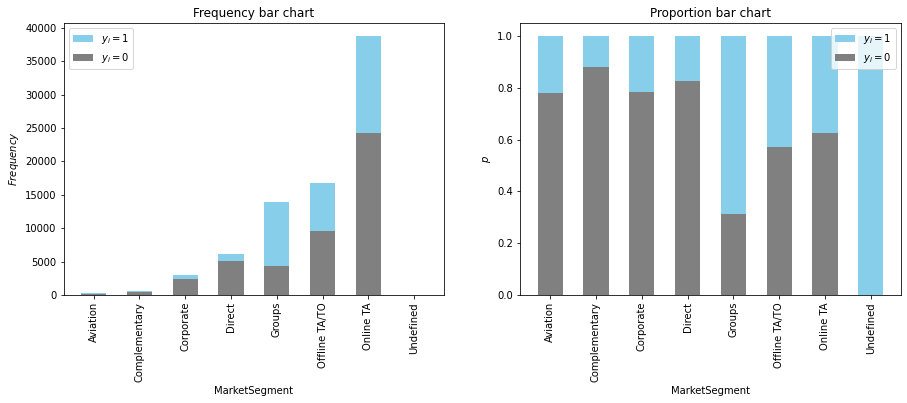

In [41]:
bar_charts_categorical(df, 'MarketSegment', 'IsCanceled')

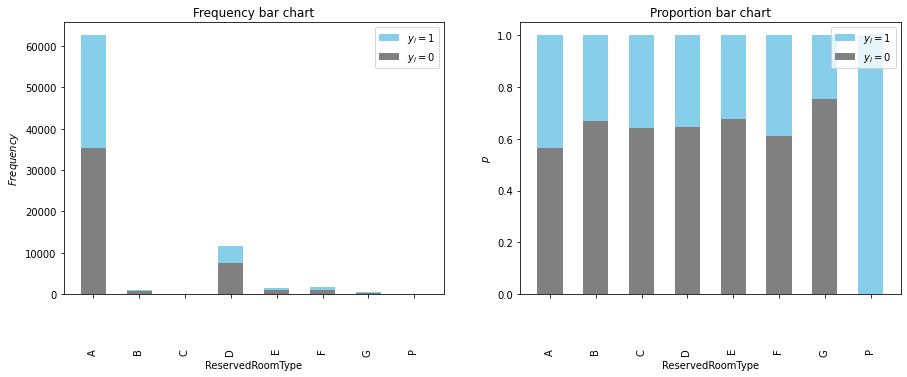

In [44]:
bar_charts_categorical(df, 'ReservedRoomType', 'IsCanceled')